# Coders Who Cook:  Machine Learning Algorithm

Index:

<a class="anchor" id="index"></a>

1. [Uploading our dataset and EDA ](#1)
2. [Encoding of categorical variables](#2)
3. [Clustering with Kmodes](#3)
4. [Sorting Clustered Profiles for Machine Learning Matching](#4)

## 1. Uploading our dataset and EDA
<a class="anchor" id="1"></a>

[^Index](#index)

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
import plotly.graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_excel('/home/user/Documents/OYI_PC_2and3/PROJECTS/hobbyhacks/Coders_Who_Cook.xlsx')

In [3]:
data.head()

,first_name,last_name,email,gender,Country,Code Language,Cuisine 1,Cuisine 2,Cuisine3,Coding Level
0,Fifi,Duker,fduker0@furl.net,Female,China,R,Asian,Brazilian,Indian,Beginner
1,Boote,Skotcher,bskotcher1@multiply.com,Male,Indonesia,R,Asian,Brazilian,Indian,Beginner
2,Sander,McGreal,smcgreal2@who.int,Male,Nigeria,R,Asian,Brazilian,Indian,Advance
3,Austine,Neasham,aneasham3@businessinsider.com,Female,Sweden,R,Asian,Brazilian,Indian,Advance
4,Andriette,Ivashkov,aivashkov4@stanford.edu,Female,China,R,Greek,BBQ,Brazilian,Intermediate


In [4]:
#The dataset contains 50 rows and 10 columns

data.shape

(50, 10)

In [5]:
#All values are categorical

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   first_name     50 non-null     object
 1   last_name      50 non-null     object
 2   email          50 non-null     object
 3   gender         50 non-null     object
 4   Country        50 non-null     object
 5   Code Language  50 non-null     object
 6   Cuisine 1      50 non-null     object
 7   Cuisine 2      50 non-null     object
 8   Cuisine3       50 non-null     object
 9   Coding Level   50 non-null     object
dtypes: object(10)
memory usage: 4.0+ KB


In [6]:
data.describe()

,first_name,last_name,email,gender,Country,Code Language,Cuisine 1,Cuisine 2,Cuisine3,Coding Level
count,50,50,50,50,50,50,50,50,50,50
unique,49,50,50,2,24,10,11,13,13,3
top,Sheeree,Tomovic,tgadesbyp@google.de,Female,China,Javascript,Asian,French,Indian,Intermediate
freq,2,1,1,31,10,11,12,9,7,19


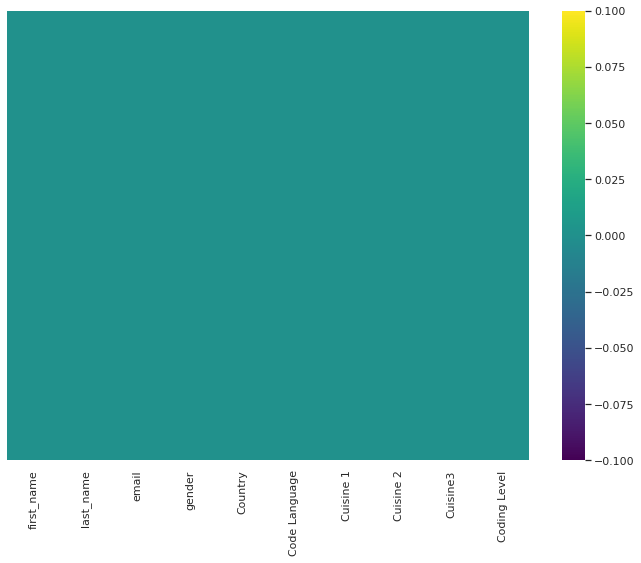

In [7]:
#According to this heatmap there are no missing values

sns.set(rc={'figure.figsize':(11.7, 8.27)})
sns.heatmap(data.isnull(), yticklabels=False, cbar=True, cmap='viridis')
plt.show()

In [8]:
#I want to see if I can spot any problem on the data

data.first_name.unique() 

array(['Fifi', 'Boote', 'Sander', 'Austine', 'Andriette', 'Marjory',
       'Fonsie', 'Emalia', 'Hercules', 'Murdoch', 'Christean', 'Loren',
       'Celene', 'Alix', 'Bobbi', 'Sheeree', 'Rori', 'Pammi', 'Daria',
       'Martita', 'Ursala', 'Wilhelm', 'Donnell', 'Cristen', 'Teresa',
       'Cally', 'Maure', 'Muffin', 'Fleur', 'Lorette', 'Onida', 'Vonnie',
       'Juan', 'Alick', 'Georgeanne', 'Mattie', 'Darbee', 'Antoni',
       'Davida', 'Silvan', 'Marcy', 'Wes', 'Eleonora', 'Rollins', 'Elna',
       'Jammal', 'Perla', 'Harmon', 'Jolie'], dtype=object)

In [9]:
data.last_name.unique() 

array(['Duker', 'Skotcher', 'McGreal', 'Neasham', 'Ivashkov', 'Gronauer',
       'Costy', 'Gouny', 'Vesty', 'Greiser', 'Killik', 'Stancliffe',
       'Linscott', 'Sibbald', 'Spindler', 'Grimme', 'Rubinowitch',
       'Mingo', 'Hayller', 'Jurczyk', 'Mc Andrew', 'Featonby', 'Rignall',
       'Kordt', 'Sharratt', 'Gadesby', 'Graver', 'Carn', 'Tomovic',
       'Cheers', 'Gendrich', 'Duchasteau', 'Alvey', 'Zoren', 'Andryunin',
       'Sussex', 'Ditchburn', 'Doddridge', 'Brogan', 'Gerriet', 'Askam',
       'Dorwood', 'Evensden', 'Merit', 'Firminger', 'Tregien', 'Crepel',
       'Solan', 'Huyche', 'Grieg'], dtype=object)

In [10]:
data.email.unique() 

array(['fduker0@furl.net', 'bskotcher1@multiply.com', 'smcgreal2@who.int',
       'aneasham3@businessinsider.com', 'aivashkov4@stanford.edu',
       'mgronauer5@narod.ru', 'fcosty6@virginia.edu',
       'egouny7@google.com.au', 'hvesty8@gnu.org',
       'mgreiser9@prnewswire.com', 'ckillika@japanpost.jp',
       'lstancliffeb@nydailynews.com', 'clinscottc@bravesites.com',
       'asibbaldd@photobucket.com', 'bspindlere@tinyurl.com',
       'sgrimmef@cnet.com', 'rrubinowitchg@webeden.co.uk',
       'pmingoh@elpais.com', 'dhaylleri@ebay.co.uk',
       'mjurczykj@macromedia.com', 'umcandrewk@yellowbook.com',
       'wfeatonbyl@hubpages.com', 'srignallm@amazon.co.jp',
       'dkordtn@tinypic.com', 'csharratto@wikispaces.com',
       'tgadesbyp@google.de', 'cgraverq@histats.com', 'mcarnr@usa.gov',
       'mtomovics@wunderground.com', 'fcheerst@devhub.com',
       'lgendrichu@tripod.com', 'oduchasteauv@admin.ch',
       'valveyw@themeforest.net', 'jzorenx@dmoz.org',
       'aandryuniny@csmon

In [11]:
data.gender.value_counts()

Female    31
Male      19
Name: gender, dtype: int64

In [12]:
data.Country.value_counts() 

China             10
Indonesia          9
Peru               3
Portugal           3
Brazil             3
France             2
Ukraine            2
United States      2
Canada             1
Bulgaria           1
Norway             1
Niger              1
United Kingdom     1
Philippines        1
Russia             1
Nicaragua          1
Sweden             1
Serbia             1
Croatia            1
American Samoa     1
Nigeria            1
Botswana           1
Afghanistan        1
Mexico             1
Name: Country, dtype: int64

In [13]:
data['Code Language'].unique() 

array(['R', 'Javascript', 'SQL', 'Ruby', 'Java', 'HTML', 'Python', 'PHP',
       'Perl', 'Aura'], dtype=object)

In [14]:
data['Code Language'].nunique() 

10

In [15]:
data['Cuisine 1'].value_counts() 

Asian        12
Germanic      6
Scottish      6
Latin         5
Vegan         5
French        3
Brazilian     3
Hungarian     3
Indian        3
Caribbean     2
Greek         2
Name: Cuisine 1, dtype: int64

In [16]:
data['Cuisine 2'].value_counts() 

French           9
Latin            9
Asian            7
BBQ              6
Brazilian        5
Vegan            4
Mediterranean    3
Vegetarian       2
Germanic         1
Cajun            1
Hungarian        1
Greek            1
Caribbean        1
Name: Cuisine 2, dtype: int64

In [17]:
data['Cuisine3'].value_counts() 

Indian        7
Scottish      7
Vegetarian    6
Brazilian     5
Cajun         5
Greek         5
Hungarian     4
BBQ           3
French        2
American      2
Caribbean     2
Germanic      1
Vegan         1
Name: Cuisine3, dtype: int64

In [18]:
data = data.rename(columns={'Cuisine3' : 'Cuisine 3'} )

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   first_name     50 non-null     object
 1   last_name      50 non-null     object
 2   email          50 non-null     object
 3   gender         50 non-null     object
 4   Country        50 non-null     object
 5   Code Language  50 non-null     object
 6   Cuisine 1      50 non-null     object
 7   Cuisine 2      50 non-null     object
 8   Cuisine 3      50 non-null     object
 9   Coding Level   50 non-null     object
dtypes: object(10)
memory usage: 4.0+ KB


In [20]:
data['Coding Level'].value_counts() 

Intermediate    19
Advance         16
Beginner        15
Name: Coding Level, dtype: int64

In [21]:
#I am trying to check if there are any duplicates

data.drop_duplicates()

,first_name,last_name,email,gender,Country,Code Language,Cuisine 1,Cuisine 2,Cuisine 3,Coding Level
0,Fifi,Duker,fduker0@furl.net,Female,China,R,Asian,Brazilian,Indian,Beginner
1,Boote,Skotcher,bskotcher1@multiply.com,Male,Indonesia,R,Asian,Brazilian,Indian,Beginner
2,Sander,McGreal,smcgreal2@who.int,Male,Nigeria,R,Asian,Brazilian,Indian,Advance
3,Austine,Neasham,aneasham3@businessinsider.com,Female,Sweden,R,Asian,Brazilian,Indian,Advance
4,Andriette,Ivashkov,aivashkov4@stanford.edu,Female,China,R,Greek,BBQ,Brazilian,Intermediate
5,Marjory,Gronauer,mgronauer5@narod.ru,Female,China,Javascript,Asian,Latin,Indian,Beginner
6,Fonsie,Costy,fcosty6@virginia.edu,Male,American Samoa,Javascript,Indian,French,Cajun,Intermediate
7,Emalia,Gouny,egouny7@google.com.au,Female,Canada,Javascript,Indian,French,Cajun,Intermediate
8,Hercules,Vesty,hvesty8@gnu.org,Male,Botswana,Javascript,Indian,French,Cajun,Intermediate
9,Murdoch,Greiser,mgreiser9@prnewswire.com,Male,Croatia,SQL,Latin,Asian,Hungarian,Advance


In [22]:
data.shape

(50, 10)

In [23]:
#I'm dropping some of the columns that will not be needed for clustering
data.drop(['first_name', 'last_name', 'email'], axis=1, inplace=True)

In [24]:
data.head()

,gender,Country,Code Language,Cuisine 1,Cuisine 2,Cuisine 3,Coding Level
0,Female,China,R,Asian,Brazilian,Indian,Beginner
1,Male,Indonesia,R,Asian,Brazilian,Indian,Beginner
2,Male,Nigeria,R,Asian,Brazilian,Indian,Advance
3,Female,Sweden,R,Asian,Brazilian,Indian,Advance
4,Female,China,R,Greek,BBQ,Brazilian,Intermediate


## 2. Encoding of categorical variables
<a class="anchor" id="2"></a>

[^Index](#index)

In [25]:
#I will encode the variables in order to manage the data easily

match = data.copy()

In [26]:
import category_encoders as ce

# Step 1. Instantiate the model with the necessary inputs
encoder = ce.OrdinalEncoder(cols=['gender', 'Country', 'Code Language', 'Cuisine 1', 'Cuisine 2', 
                                 'Cuisine 3', 'Coding Level'])

# Step 2. Fit the variable to the instatiated model
match = encoder.fit_transform(match)

In [27]:
print(match)

    gender  Country  Code Language  Cuisine 1  Cuisine 2  Cuisine 3  \
0        1        1              1          1          1          1   
1        2        2              1          1          1          1   
2        2        3              1          1          1          1   
3        1        4              1          1          1          1   
4        1        1              1          2          2          2   
5        1        1              2          1          3          1   
6        2        5              2          3          4          3   
7        1        6              2          3          4          3   
8        2        7              2          3          4          3   
9        2        8              3          4          5          4   
10       1        1              3          5          4          1   
11       1        9              3          5          4          1   
12       1       10              3          1          3          5   
13    

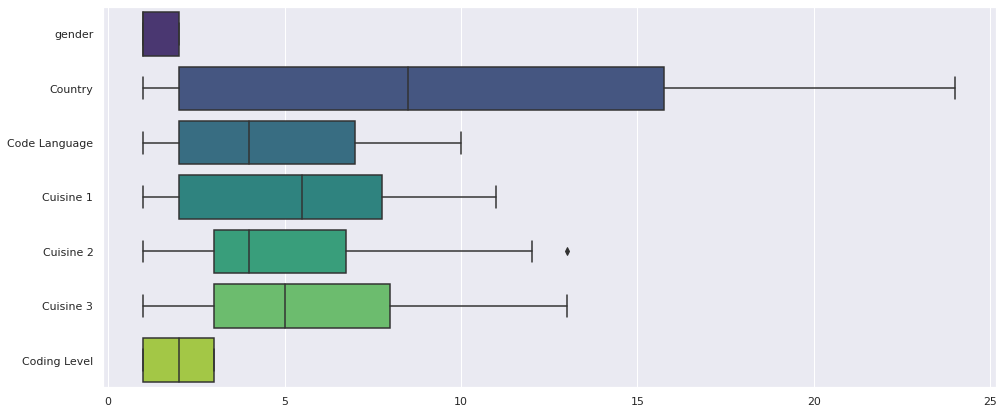

In [28]:
#How is the distribution of the variables? Is it true there were not outliers?

plt.figure(figsize=(16,7))
sns.boxplot(data=match.loc[:] , orient="h", palette="viridis")

In [29]:
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   gender         50 non-null     int64
 1   Country        50 non-null     int64
 2   Code Language  50 non-null     int64
 3   Cuisine 1      50 non-null     int64
 4   Cuisine 2      50 non-null     int64
 5   Cuisine 3      50 non-null     int64
 6   Coding Level   50 non-null     int64
dtypes: int64(7)
memory usage: 2.9 KB


## 3. Clustering with Kmodes
<a class="anchor" id="3"></a>

[^Index](#index)

In [30]:
pip install kmodes

You should consider upgrading via the '/home/user/my-project-env/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [31]:
#Using K-Mode with "Cao" initialization

from kmodes.kmodes import KModes

km_cao = KModes(n_clusters=2, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(match)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2, cost: 214.0


In [32]:
# Predicted Clusters
fitClusters_cao

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0], dtype=uint16)

In [33]:
clusterCentroidsDf = pd.DataFrame(km_cao.cluster_centroids_)
clusterCentroidsDf.columns = match.columns

In [34]:
# Mode of the clusters
clusterCentroidsDf

,gender,Country,Code Language,Cuisine 1,Cuisine 2,Cuisine 3,Coding Level
0,1,1,2,1,4,1,2
1,1,2,4,6,2,7,3


In [35]:
#Using K-Mode with "Huang" initialization

km_huang = KModes(n_clusters=2, init = "Huang", n_init = 1, verbose=1)
fitClusters_huang = km_huang.fit_predict(match)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 219.0


In [36]:
# Predicted clusters
fitClusters_huang

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0], dtype=uint16)

In [37]:
#Choosing K by comparing Cost against each K

cost = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(match)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 251.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2, cost: 214.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3, cost: 190.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3, cost: 175.0


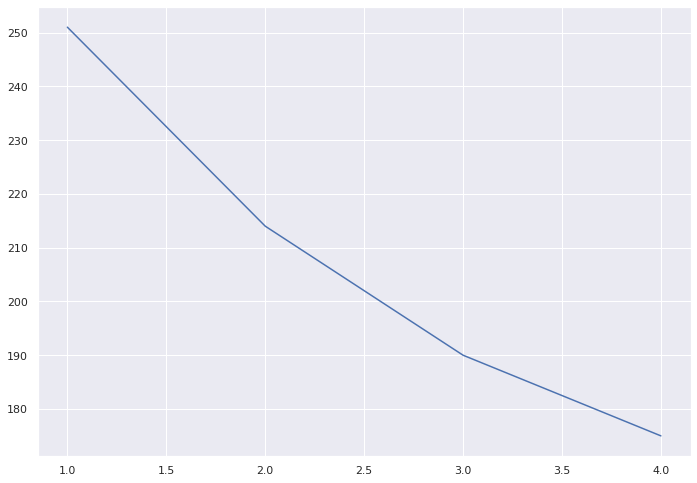

In [38]:
y = np.array([i for i in range(1,5,1)])
plt.plot(y,cost)

In [39]:
## Choosing K=2

In [40]:
km_cao = KModes(n_clusters=2, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(match)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2, cost: 214.0


In [41]:
fitClusters_cao

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0], dtype=uint16)

In [42]:
#Combining the predicted clusters with the original DF

In [43]:
match_reset = match.reset_index()

In [44]:
clustersDf = pd.DataFrame(fitClusters_cao)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([match_reset, clustersDf], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index', 'level_0'], axis = 1)

In [45]:
combinedDf.head()

,gender,Country,Code Language,Cuisine 1,Cuisine 2,Cuisine 3,Coding Level,cluster_predicted
0,1,1,1,1,1,1,1,0
1,2,2,1,1,1,1,1,0
2,2,3,1,1,1,1,2,0
3,1,4,1,1,1,1,2,0
4,1,1,1,2,2,2,3,1


In [46]:
combinedDf.cluster_predicted.nunique()

2

In [47]:
#Cluster Identification

In [48]:
cluster_0 = combinedDf[combinedDf['cluster_predicted'] == 0]
cluster_1 = combinedDf[combinedDf['cluster_predicted'] == 1]

In [49]:
cluster_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 0 to 49
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   gender             35 non-null     int64 
 1   Country            35 non-null     int64 
 2   Code Language      35 non-null     int64 
 3   Cuisine 1          35 non-null     int64 
 4   Cuisine 2          35 non-null     int64 
 5   Cuisine 3          35 non-null     int64 
 6   Coding Level       35 non-null     int64 
 7   cluster_predicted  35 non-null     uint16
dtypes: int64(7), uint16(1)
memory usage: 2.3 KB


In [50]:
cluster_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 4 to 48
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   gender             15 non-null     int64 
 1   Country            15 non-null     int64 
 2   Code Language      15 non-null     int64 
 3   Cuisine 1          15 non-null     int64 
 4   Cuisine 2          15 non-null     int64 
 5   Cuisine 3          15 non-null     int64 
 6   Coding Level       15 non-null     int64 
 7   cluster_predicted  15 non-null     uint16
dtypes: int64(7), uint16(1)
memory usage: 990.0 bytes


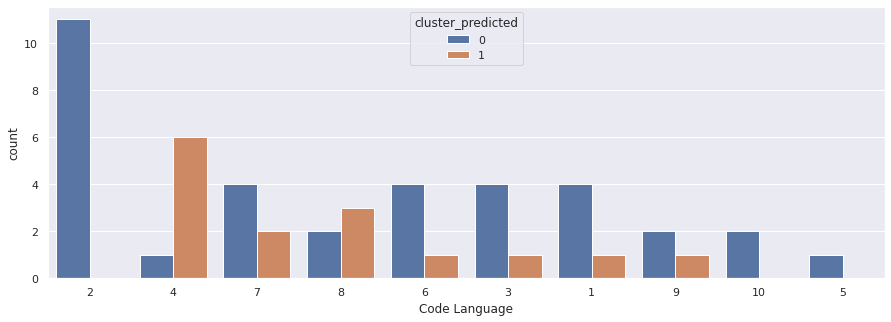

In [51]:
#Code Language

plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['Code Language'],order=combinedDf['Code Language'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

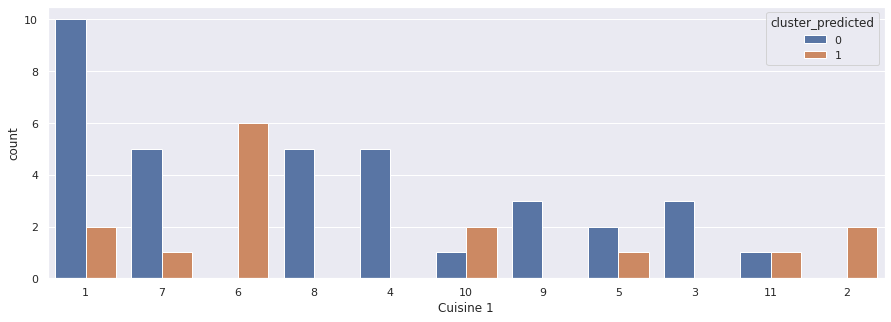

In [52]:
#Cuisine 1

plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['Cuisine 1'],order=combinedDf['Cuisine 1'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

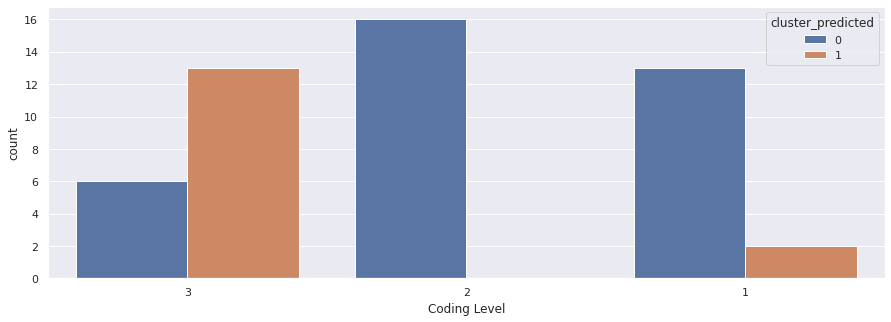

In [53]:
#Coding Level

plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['Coding Level'],order=combinedDf['Coding Level'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

In [54]:
## Choosing K=3

In [55]:
km_cao = KModes(n_clusters=3, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(match)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3, cost: 190.0


In [56]:
fitClusters_cao

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 2, 2, 2, 0, 1, 1, 1, 1, 2, 2, 0, 0,
       0, 1, 2, 0, 2, 1, 1, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 1, 1, 0, 1,
       0, 2, 2, 1, 1, 0], dtype=uint16)

In [57]:
#Combining the predicted clusters with the original DF

In [58]:
match_reset = match.reset_index()

In [59]:
clustersDf = pd.DataFrame(fitClusters_cao)
clustersDf.columns = ['cluster_predicted']
combinedDf3 = pd.concat([match_reset, clustersDf], axis = 1).reset_index()
combinedDf3 = combinedDf3.drop(['index', 'level_0'], axis = 1)

In [60]:
combinedDf3.head()

,gender,Country,Code Language,Cuisine 1,Cuisine 2,Cuisine 3,Coding Level,cluster_predicted
0,1,1,1,1,1,1,1,0
1,2,2,1,1,1,1,1,0
2,2,3,1,1,1,1,2,0
3,1,4,1,1,1,1,2,0
4,1,1,1,2,2,2,3,1


In [61]:
combinedDf3.cluster_predicted.nunique()

3

In [62]:
#Cluster Identification

In [63]:
cluster_0 = combinedDf3[combinedDf3['cluster_predicted'] == 0]
cluster_1 = combinedDf3[combinedDf3['cluster_predicted'] == 1]
cluster_2 = combinedDf3[combinedDf3['cluster_predicted'] == 2]

In [64]:
cluster_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 0 to 49
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   gender             23 non-null     int64 
 1   Country            23 non-null     int64 
 2   Code Language      23 non-null     int64 
 3   Cuisine 1          23 non-null     int64 
 4   Cuisine 2          23 non-null     int64 
 5   Cuisine 3          23 non-null     int64 
 6   Coding Level       23 non-null     int64 
 7   cluster_predicted  23 non-null     uint16
dtypes: int64(7), uint16(1)
memory usage: 1.5 KB


In [65]:
cluster_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13 entries, 4 to 48
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   gender             13 non-null     int64 
 1   Country            13 non-null     int64 
 2   Code Language      13 non-null     int64 
 3   Cuisine 1          13 non-null     int64 
 4   Cuisine 2          13 non-null     int64 
 5   Cuisine 3          13 non-null     int64 
 6   Coding Level       13 non-null     int64 
 7   cluster_predicted  13 non-null     uint16
dtypes: int64(7), uint16(1)
memory usage: 858.0 bytes


In [66]:
cluster_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14 entries, 9 to 46
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   gender             14 non-null     int64 
 1   Country            14 non-null     int64 
 2   Code Language      14 non-null     int64 
 3   Cuisine 1          14 non-null     int64 
 4   Cuisine 2          14 non-null     int64 
 5   Cuisine 3          14 non-null     int64 
 6   Coding Level       14 non-null     int64 
 7   cluster_predicted  14 non-null     uint16
dtypes: int64(7), uint16(1)
memory usage: 924.0 bytes


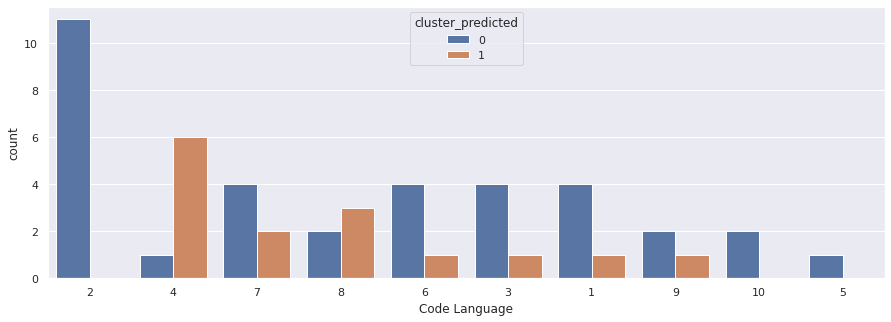

In [67]:
#Code Language

plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf3['Code Language'],order=combinedDf3['Code Language'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

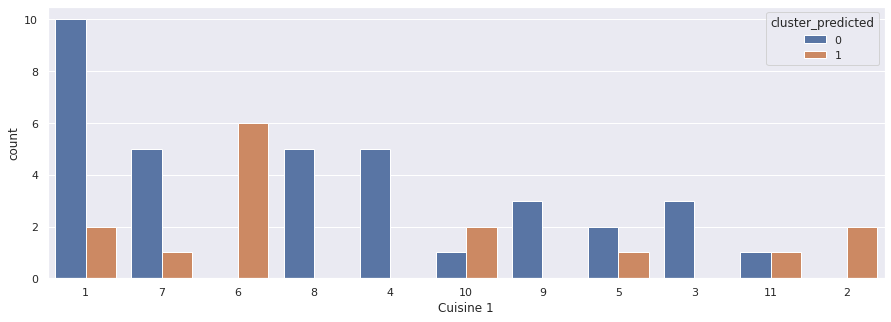

In [68]:
#Cuisine 1

plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf3['Cuisine 1'],order=combinedDf3['Cuisine 1'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

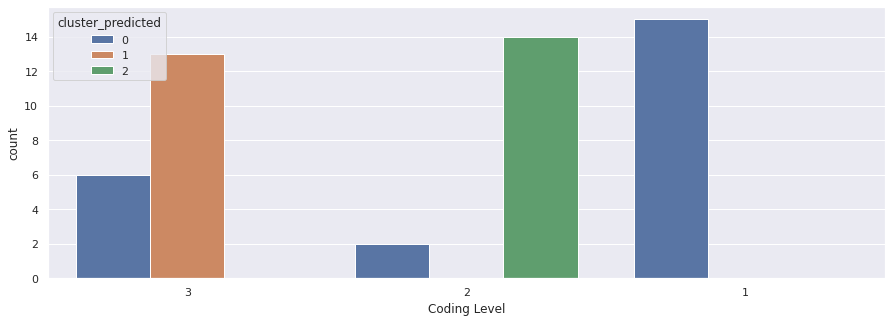

In [69]:
#Coding Level

plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf3['Coding Level'],order=combinedDf3['Coding Level'].value_counts().index,hue=combinedDf3['cluster_predicted'])
plt.show()

In [70]:
#After using k= 2 and K= 3 I keep k = 2 

## 4. Sorting Clustered Profiles for Machine Learning Matching
<a class="anchor" id="4"></a>

[^Index](#index)

In [71]:
#Sorting the Clustered Profiles

In [73]:
df = combinedDf.copy()

In [85]:
import random

# Randomly choosing a cluster
rand_cluster = random.choice(df['cluster_predicted'].unique())

# Assigning the Cluster Profiles as a new DF
group = df[df['cluster_predicted']==rand_cluster].drop('cluster_predicted', axis=1)

## Finding Correlations among the users

# Trasnposing the DF so that we are correlating with the index(users)
corr_group = group.T.corr()


## Finding the Top 10 Similar Users

# Randomly selecting a user
random_user = random.choice(corr_group.index)

print("Top 3 most similar users to User #", random_user, '\n')

# Creating a DF with the top 10 most similar users to the selected user
top_3_sim = corr_group[[random_user]].sort_values(by=[random_user],axis=0, ascending=False)[1:4]

# Printing out the results
print(top_3_sim)

print("\nThe most similar user to User #", random_user, "is User #", top_3_sim.index[0])

Top 3 most similar users to User # 48 

          48
47  0.852679
16  0.852235
41  0.802068

The most similar user to User # 48 is User # 47
